In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

from encoder import Grid
from common import get_scene

load_dotenv()

True

In [2]:
sequence_id = "sequence_1"
scene_fn = os.path.join(
    os.getenv("DATA_LOCATION"), sequence_id, "scenes.json"
)
detections = get_scene(scene_fn)
detections.head(2)

,timestamp,x_cc,y_cc,vr_compensated,rcs,label_id
0,156862659751,10.533686,5.161779,0.244834,0.101503,11
1,156862659751,11.381632,5.069020,0.193050,-3.724234,11


In [3]:
ts = detections["timestamp"].unique()[1]
dets = detections.loc[detections["timestamp"] == ts]
grid_fl = Grid(x_lims=(2, 100), y_lims=(-50, 20), cell_size=0.5)
grid_fl.fill_grid(dets)
grid_fl.fill_grid(dets, is_output=True)

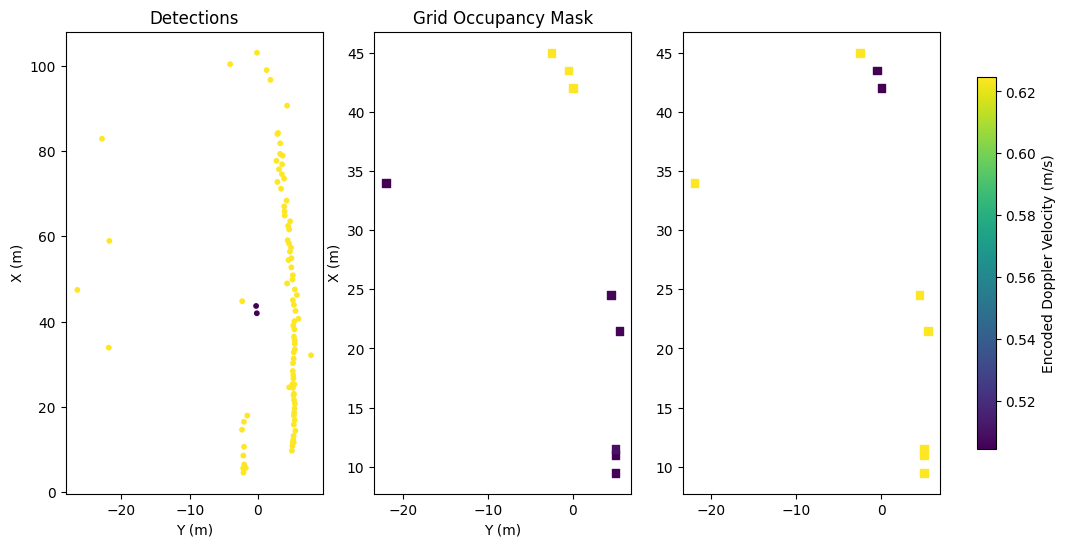

In [6]:
from config import label_to_index, DONT_CARE, index_to_label

mask = grid_fl.grid[:, :, 2] > 0  # occupancy_mask
x_inds, y_inds = np.where(mask)
x_pos = x_inds * grid_fl.cell_size + grid_fl.x_lims[0]
y_pos = y_inds * grid_fl.cell_size + grid_fl.y_lims[0]

mask = grid_fl.out_grid[:, :, 0] != label_to_index[DONT_CARE]
out_x_inds, out_y_inds = np.where(mask)
out_x_pos = out_x_inds * grid_fl.cell_size + grid_fl.x_lims[0]
out_y_pos = out_y_inds * grid_fl.cell_size + grid_fl.y_lims[0]


fig, axes = plt.subplots(1, 3, figsize=(12, 6))
ax = axes[0]
# ax.scatter(dets["y_cc"], dets["x_cc"], c=dets["vr_compensated"], s=10)
ax.scatter(dets["y_cc"], dets["x_cc"], c=dets["label_id"], s=10)
ax.set_title("Detections")
ax.set_xlabel("Y (m)")
ax.set_ylabel("X (m)")

ax = axes[1]
colors_rcs = grid_fl.grid[x_inds, y_inds, 0]
colors_doppler = grid_fl.grid[x_inds, y_inds, 1]
colors_count= grid_fl.grid[x_inds, y_inds, 2]
ax.scatter(y_pos, x_pos, marker="s", c=colors_doppler, s=30)
ax.set_title("Grid Occupancy Mask")
ax.set_xlabel("Y (m)")
ax.set_ylabel("X (m)")
cbar = fig.colorbar(ax.collections[0], ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Encoded Doppler Velocity (m/s)')


ax = axes[2]
colors = grid_fl.out_grid[out_x_inds, out_y_inds, 0]
ax.scatter(out_y_pos, out_x_pos, marker="s", c=colors, s=30)


plt.show()


In [5]:
grid_fl.out_grid.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'